# **Importing Libraries and Reading the Data**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import joblib

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
X_train = joblib.load("X_train.pkl")
X_test = joblib.load("X_test.pkl")
Y_train = joblib.load("Y_train.pkl")
Y_test = joblib.load("Y_test.pkl")

In [4]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (425, 30)
X_test shape: (107, 30)
Y_train shape: (425,)
Y_test shape: (107,)


# **Classification Models**

**Logistic Regression**

In [11]:
Log_Reg_cls = LogisticRegression(penalty='elasticnet', solver='saga', C=0.8, l1_ratio=0.8)
Log_Reg_cls.fit(X_train,Y_train)
predictions= Log_Reg_cls.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        38

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**K-Neighbors Classifier**

In [13]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)

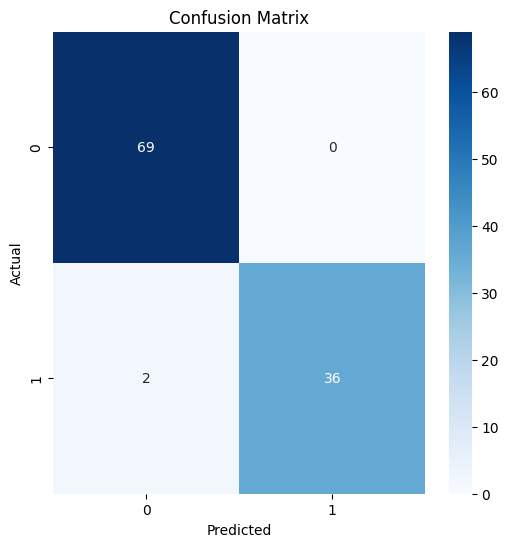




              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.95      0.97        38

    accuracy                           0.98       107
   macro avg       0.99      0.97      0.98       107
weighted avg       0.98      0.98      0.98       107

[[69  0]
 [ 2 36]]
0.9813084112149533


In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n\n")
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

**Decision Tree**

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)

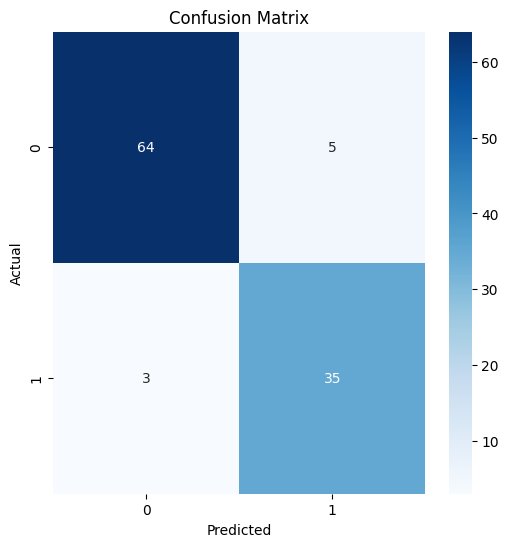




              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.88      0.92      0.90        38

    accuracy                           0.93       107
   macro avg       0.92      0.92      0.92       107
weighted avg       0.93      0.93      0.93       107

[[64  5]
 [ 3 35]]
0.9252336448598131


In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n\n")
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

**Support Vector Classifier**

In [38]:
svc_cls = SVC(kernel='linear')
svc_cls.fit(X_train,Y_train)
predictions= svc_cls.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.97      0.97      0.97        38

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



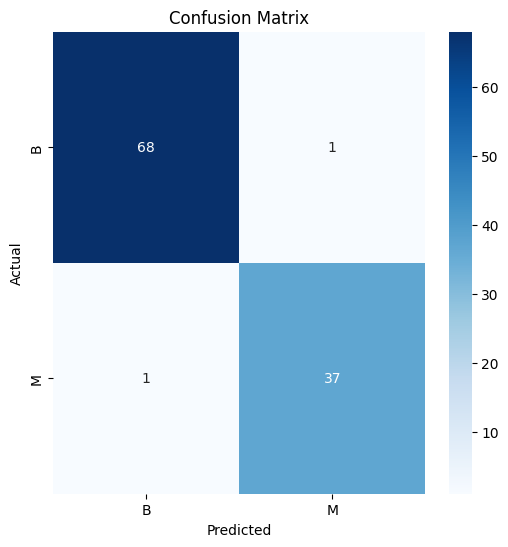

In [39]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**SGD Classifier**

In [40]:
sgd_cls = SGDClassifier(loss='log_loss', average=True)
sgd_cls.fit(X_train,Y_train)
predictions = sgd_cls.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.95      1.00      0.97        38

    accuracy                           0.98       107
   macro avg       0.97      0.99      0.98       107
weighted avg       0.98      0.98      0.98       107



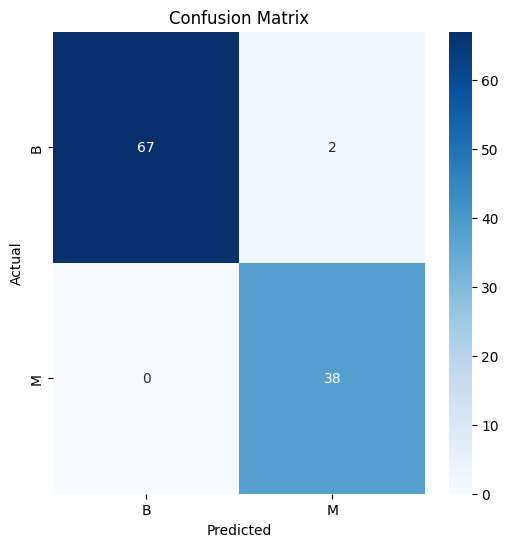

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

*  The Best Model is **Logistic Regression** with **Accuracy of 100%** and **f1-score of 1.0**

# **Saving The Best Model**

In [44]:
joblib.dump(Log_Reg_cls, "final_model.pkl")

['final_model.pkl']

# **✅ The Breast Cancer Prediction Project Was Completed Successfully.**

**The data was cleaned, visualized, and used to train models capable of distinguishing between malignant and benign cases with strong accuracy. These results highlight the effectiveness of data-driven approaches in medical diagnosis.**

##Authors ✨

*   Aya Ashraf
*   Tasnim Qutb
*   Ahmed Barakat
*   Mohammed Osama
*   Mohammed Saied